<a href="https://colab.research.google.com/github/ekrell/icore_temp/blob/main/intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# iCORE: Intro to Google Colab

The purpose of the notebook is to introduce Google Colab

Contents:
1. Intro to Google Colab
2. Data exploration demo
3. GPU Acceleration

Google Colab is a service that hosts Jupyter Notebooks.

Jupyter Notebooks are an **interactive development environment** for Python, where code blocks and text blocks live together in a linear sequence. Each block (or cell) can be run at any time, allowing developers to modify a unit of code without re-running the entire program. Also, the code blocks can produce visual outputs.

Notebooks are very useful for data exploration and analysis, tutorials, richly documented code, and for any task where the code can be decomposed into a sequence of smaller tasks with a minimum of looping back to previous tasks.

Google Colab is not just a hosting service: colab can load arbitrary Python Notebook files (`.ipynb`), but introduces some additional functionality.

### Markdown formatting

Markdown is a plain-text formatting specification that has become very widely used due to its simplicity and ease of implementation.

You type the text with Markdown formatting syntax. Once the text cell is run, the formatted text is generated.

[Markdown guide](https://www.markdownguide.org/basic-syntax/)

Note: in code repos, you might see documents like 'README.md'. In this context, the '.md' extension indicates Markdown and some platforms (like GitHub) will render the document with the formatting.

Markdown examples are present throughout today's presentation.

### Code blocks

In [ ]:
# This is a code block!
# You can use markdown... but it won't do **any** good!

# Whatever code you write will execute
values = [10.0, 8.0, 9.4, 7.3, 8.4, 14.2]
mean_values = sum(values) / len(values)
print(mean_values)

9.549999999999999


In [ ]:
# The runtime persists across cells
[x**2 for x in values]

[100.0, 64.0, 88.36000000000001, 53.29, 70.56, 201.64]

In [ ]:
# Define a function
def mean_squared_error(predicted, actual):
  return sum([(p - a)**2 for p, a in zip(predicted, actual)]) / len(predicted)

In [ ]:
targets = [10, 10, 8, 10, 0, 0, 0, 10, 12, 8]
predictions = [9.5, 7.5, 7.5, 10.9, 0.5, 0.6, 0.4, 9.2, 15.2, 9.2]
mse = mean_squared_error(predictions, targets)
print(mse)

2.064999999999999


### Linux

This environment lives within a Linux instance, which you can use directly

Just put a bang (`!`) in front of the command.

(don't worry, its a virtual machine created on the fly, so you can't break anything)

In [ ]:
# Where am I?
!pwd

# List files
!ls -l

# What is my username
!whoami

# Check out the system
!ls /

/content
total 4
drwxr-xr-x 1 root root 4096 Apr  3 13:37 sample_data
root
bin			    dev     lib32   NGC-DL-CONTAINER-LICENSE  root  tmp
boot			    etc     lib64   opt			      run   tools
content			    home    libx32  proc		      sbin  usr
cuda-keyring_1.1-1_all.deb  kaggle  media   python-apt		      srv   var
datalab			    lib     mnt     python-apt.tar.xz	      sys


In [ ]:
# You can even mix Python and Linux commands
dir_name = 'test_dir'

!mkdir -p {dir_name}
!ls

sample_data  test_dir


### Install libraries and packages

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# One more import...
import netCDF4 as nc

ModuleNotFoundError: No module named 'netCDF4'

In [ ]:
# Install it
!pip install netCDF4
import netCDF4 as nc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 46.1 MB/s eta 0:00:00


In [ ]:
# Can also install Linux commands
!tree

/bin/bash: line 1: tree: command not found


In [ ]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (95.8 kB/s)
Selecting previously unselected package tree.
(Reading database ... 126213 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!tree

.
├── sample_data
│   ├── anscombe.json
│   ├── california_housing_test.csv
│   ├── california_housing_train.csv
│   ├── mnist_test.csv
│   ├── mnist_train_small.csv
│   └── README.md
└── test_dir

2 directories, 6 files


### Getting data

Colab has access to files stored in the virtual Linux environment. So, to work with data we need to get it in here somehow.

- Upload the file through the browser GUI
- Fetch data from remote stores
- Connect to your Google Drive

**Upload a file**

First, we need a file to upload.

1. Download the [abalone dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data)
2. Upload using the sidebar GUI (Files --> Upload)

Columns:
- Sex (M, F, I)  <-- I is infant
- Length
- Diameter
- Height
- Whole weight
- Shucked weight
- Viscera weight
- Shell weight
- Rings

In [ ]:
df = pd.read_csv('abalone.data', header=None)
df.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


**Download from remote source**

In [ ]:
# Delete abalone file
!ls
!rm abalone.data
!ls

abalone.data  sample_data  test_dir
sample_data  test_dir


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

df = pd.read_csv('abalone.data', header=None)
df.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df

--2025-04-04 18:31:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘abalone.data’

abalone.data            [ <=>                ] 187.38K   955KB/s    in 0.2s    

2025-04-04 18:31:59 (955 KB/s) - ‘abalone.data’ saved [191873]



,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


**Download remote NetCDF data**

We will download imagery from Himawari-8 geostationary satellite

This demo shows larger, more complex data

In [ ]:
!wget https://www.data.jma.go.jp/mscweb/en/himawari89/space_segment/hsd_sampleB/NC_H08_20161117_0230_JP02.zip

--2025-04-04 18:31:59--  https://www.data.jma.go.jp/mscweb/en/himawari89/space_segment/hsd_sampleB/NC_H08_20161117_0230_JP02.zip
Resolving www.data.jma.go.jp (www.data.jma.go.jp)... 3.167.138.103, 3.167.138.86, 3.167.138.67, ...
Connecting to www.data.jma.go.jp (www.data.jma.go.jp)|3.167.138.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48873519 (47M) [application/zip]
Saving to: ‘NC_H08_20161117_0230_JP02.zip’

NC_H08_20161117_023 100%[===================>]  46.61M   148MB/s    in 0.3s    

2025-04-04 18:32:00 (148 MB/s) - ‘NC_H08_20161117_0230_JP02.zip’ saved [48873519/48873519]



In [ ]:
# Unzip
!unzip NC_H08_20161117_0230_JP02.zip

Archive:  NC_H08_20161117_0230_JP02.zip
  inflating: NC_H08_20161117_0230_B01_JP02_R10.nc.bz2  
  inflating: NC_H08_20161117_0230_B02_JP02_R10.nc.bz2  
  inflating: NC_H08_20161117_0230_B03_JP02_R05.nc.bz2  
  inflating: NC_H08_20161117_0230_B04_JP02_R10.nc.bz2  
  inflating: NC_H08_20161117_0230_B05_JP02_R20.nc.bz2  
  inflating: NC_H08_20161117_0230_B06_JP02_R20.nc.bz2  
  inflating: NC_H08_20161117_0230_B07_JP02_R20.nc.bz2  
  inflating: NC_H08_20161117_0230_B08_JP02_R20.nc.bz2  
  inflating: NC_H08_20161117_0230_B09_JP02_R20.nc.bz2  
  inflating: NC_H08_20161117_0230_B10_JP02_R20.nc.bz2  
  inflating: NC_H08_20161117_0230_B11_JP02_R20.nc.bz2  
  inflating: NC_H08_20161117_0230_B12_JP02_R20.nc.bz2  
  inflating: NC_H08_20161117_0230_B13_JP02_R20.nc.bz2  
  inflating: NC_H08_20161117_0230_B14_JP02_R20.nc.bz2  
  inflating: NC_H08_20161117_0230_B15_JP02_R20.nc.bz2  
  inflating: NC_H08_20161117_0230_B16_JP02_R20.nc.bz2  


In [ ]:
# Bunzip
!bunzip2 *.bz2
!ls

abalone.data			      NC_H08_20161117_0230_B10_JP02_R20.nc
NC_H08_20161117_0230_B01_JP02_R10.nc  NC_H08_20161117_0230_B11_JP02_R20.nc
NC_H08_20161117_0230_B02_JP02_R10.nc  NC_H08_20161117_0230_B12_JP02_R20.nc
NC_H08_20161117_0230_B03_JP02_R05.nc  NC_H08_20161117_0230_B13_JP02_R20.nc
NC_H08_20161117_0230_B04_JP02_R10.nc  NC_H08_20161117_0230_B14_JP02_R20.nc
NC_H08_20161117_0230_B05_JP02_R20.nc  NC_H08_20161117_0230_B15_JP02_R20.nc
NC_H08_20161117_0230_B06_JP02_R20.nc  NC_H08_20161117_0230_B16_JP02_R20.nc
NC_H08_20161117_0230_B07_JP02_R20.nc  NC_H08_20161117_0230_JP02.zip
NC_H08_20161117_0230_B08_JP02_R20.nc  sample_data
NC_H08_20161117_0230_B09_JP02_R20.nc  test_dir


In [ ]:
!ls

abalone.data			      NC_H08_20161117_0230_B10_JP02_R20.nc
NC_H08_20161117_0230_B01_JP02_R10.nc  NC_H08_20161117_0230_B11_JP02_R20.nc
NC_H08_20161117_0230_B02_JP02_R10.nc  NC_H08_20161117_0230_B12_JP02_R20.nc
NC_H08_20161117_0230_B03_JP02_R05.nc  NC_H08_20161117_0230_B13_JP02_R20.nc
NC_H08_20161117_0230_B04_JP02_R10.nc  NC_H08_20161117_0230_B14_JP02_R20.nc
NC_H08_20161117_0230_B05_JP02_R20.nc  NC_H08_20161117_0230_B15_JP02_R20.nc
NC_H08_20161117_0230_B06_JP02_R20.nc  NC_H08_20161117_0230_B16_JP02_R20.nc
NC_H08_20161117_0230_B07_JP02_R20.nc  NC_H08_20161117_0230_JP02.zip
NC_H08_20161117_0230_B08_JP02_R20.nc  sample_data
NC_H08_20161117_0230_B09_JP02_R20.nc  test_dir


In [ ]:
band = "05"
ds = nc.Dataset(f"NC_H08_20161117_0230_B{band}_JP02_R20.nc")
ds

<class 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Himawari-8 band-5 ALBEDO
    institution: MSC/JMA
    source: Himawari-8 satellite observation
    history: at 05:07:27 03/16/2017: file created. NC_H08_20161117_0230_B05_JP02_R20.nc (netCDF 4.3.2 of Nov 18 2014 05:13:23 $)
    Conventions: CF-1.4
    dimensions(sizes): latitude(1351), longitude(1651), start_time(1), end_time(1)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), float32 albedo(latitude, longitude), float64 start_time(), float64 end_time()
    groups: 

In [ ]:
# Extract data
arr = ds.variables['albedo'][:]
arr.shape

(1351, 1651)

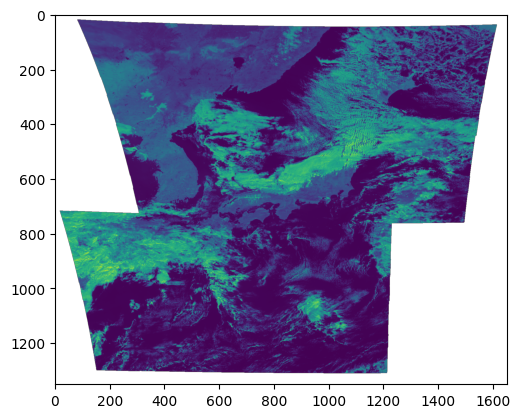

In [ ]:
# Plot
plt.imshow(arr)

In [ ]:
lats = ds.variables['latitude'][:]
lons = ds.variables['longitude'][:]
lat_bnds, lon_bnds = [35, 50], [130, 150]

lat_inds = np.where((lats > lat_bnds[0]) & (lats < lat_bnds[1]))[0]
lon_inds = np.where((lons > lon_bnds[0]) & (lons < lon_bnds[1]))[0]

arr_subset = ds.variables["albedo"][lat_inds,lon_inds]

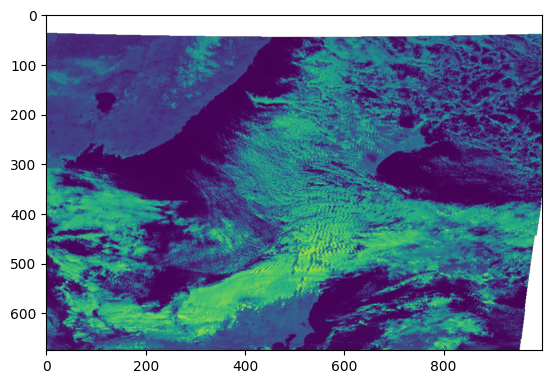

In [ ]:
plt.imshow(arr_subset)

**Define a function to plot several bands**

In [ ]:
def plot_bands(ds, band, ax):
  ds = nc.Dataset(f"NC_H08_20161117_0230_B{band}_JP02_R20.nc")
  var = list(set(ds.variables.keys()) - set(["latitude", "longitude", "start_time", "end_time"]))[0]
  arr = ds.variables[var][:]
  ax.imshow(arr)

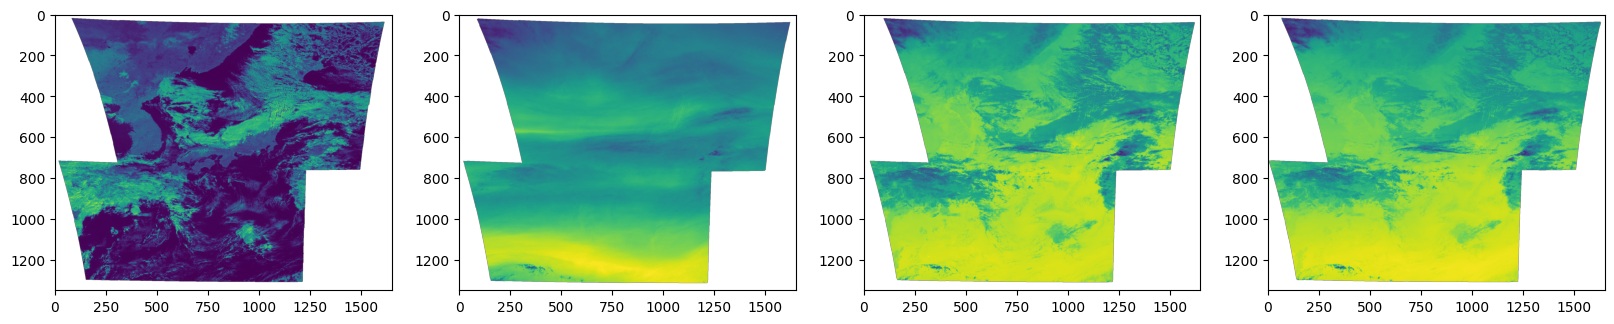

In [ ]:
bands = ["05", "08", "14", "16"]

fix, axs = plt.subplots(1, len(bands), figsize=(20, 10))
for band, ax in zip(bands, axs):
  plot_bands(ds, band, ax)

### Saving data

You can save files to the environment.

But remember: the environment is not persistent! Be sure to download to your PC or upload to remote store!

In [ ]:
plt.savefig("Himawari_plot.png");

<Figure size 640x480 with 0 Axes>

In [ ]:
!ls | grep .png

Himawari_plot.png
